In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import lagrange

Для начала вычислим матрицу дифференцирования почленно:
$$D_{ij} = l_j'(x_i) = \frac{\prod\limits_{k=0, k\neq j, k\neq i}^n(x_i - x_k)}{\prod\limits_{k=0, k\neq j}^n(x_j-x_k)}$$
$$D_{ii} = l_i'(x_i) = \sum\limits_{k=0, k\neq i}^n\frac{1}{(x_i-x_k)}$$

In [2]:
class DiffMatrixApprox:
    def __init__(self, lower_bound, upper_bound, grid_size, func):
        self.grid = self._find_chebyshev_grid(grid_size, lower_bound, upper_bound)
        self.sz = grid_size
        self.func = func
        self.diff_mat = self._find_diff_matrix()
        
    def _find_chebyshev_grid(self, grid_size, lower_bound, upper_bound):
        coef = np.cos(np.pi * (2 * np.arange(1, grid_size + 1) - 1) / (2 * grid_size))
        g = (lower_bound + upper_bound) / 2 + coef * (upper_bound - lower_bound) / 2
        return g
    
    def _find_diff_matrix(self):
        x = self.grid
        diff_mat = np.zeros((self.sz, self.sz))
        prod =  x[:, None] - x[None, :] + np.eye(self.sz)
        prod = np.prod(prod, axis=0)
        
        for i in range(self.sz):
            for j in range(self.sz):
                if i != j:
                    diff_mat[i][j] = prod[i] / (x[i] - x[j])
        for i in range(self.sz):
            diff_mat[i][i] = np.sum(diff_mat[i])
        return diff_mat / prod.reshape(1, self.sz)
    
    def grad(self):
        return self.diff_mat @ self.func(self.grid)

In [3]:
def calc_and_draw_plot(func, grad_func, n_max, func_label, a, b):
    diffs = []
    for n in range(1, n_max+1):
        diff_mat = DiffMatrixApprox(a, b, n, func)
        diffs.append(np.linalg.norm(grad_func(diff_mat.grid) - diff_mat.grad(), np.inf))

    plt.figure(figsize=(20,10))
    plt.semilogy(np.arange(1, n_max+1), diffs)
    plt.title(r"Норма разности приближенного и точного значения градиента функции " + func_label)
    plt.grid()
    plt.xlabel("Количество узлов")
    plt.show() 

In [4]:
func1 = lambda x: x ** 3
grad_func1 = lambda x: 3 * x ** 2

f2 = np.exp
grad_f2 = np.exp

f3 = np.sin
grad_f3 = np.cos

n_max = 100
a, b = -1, 1

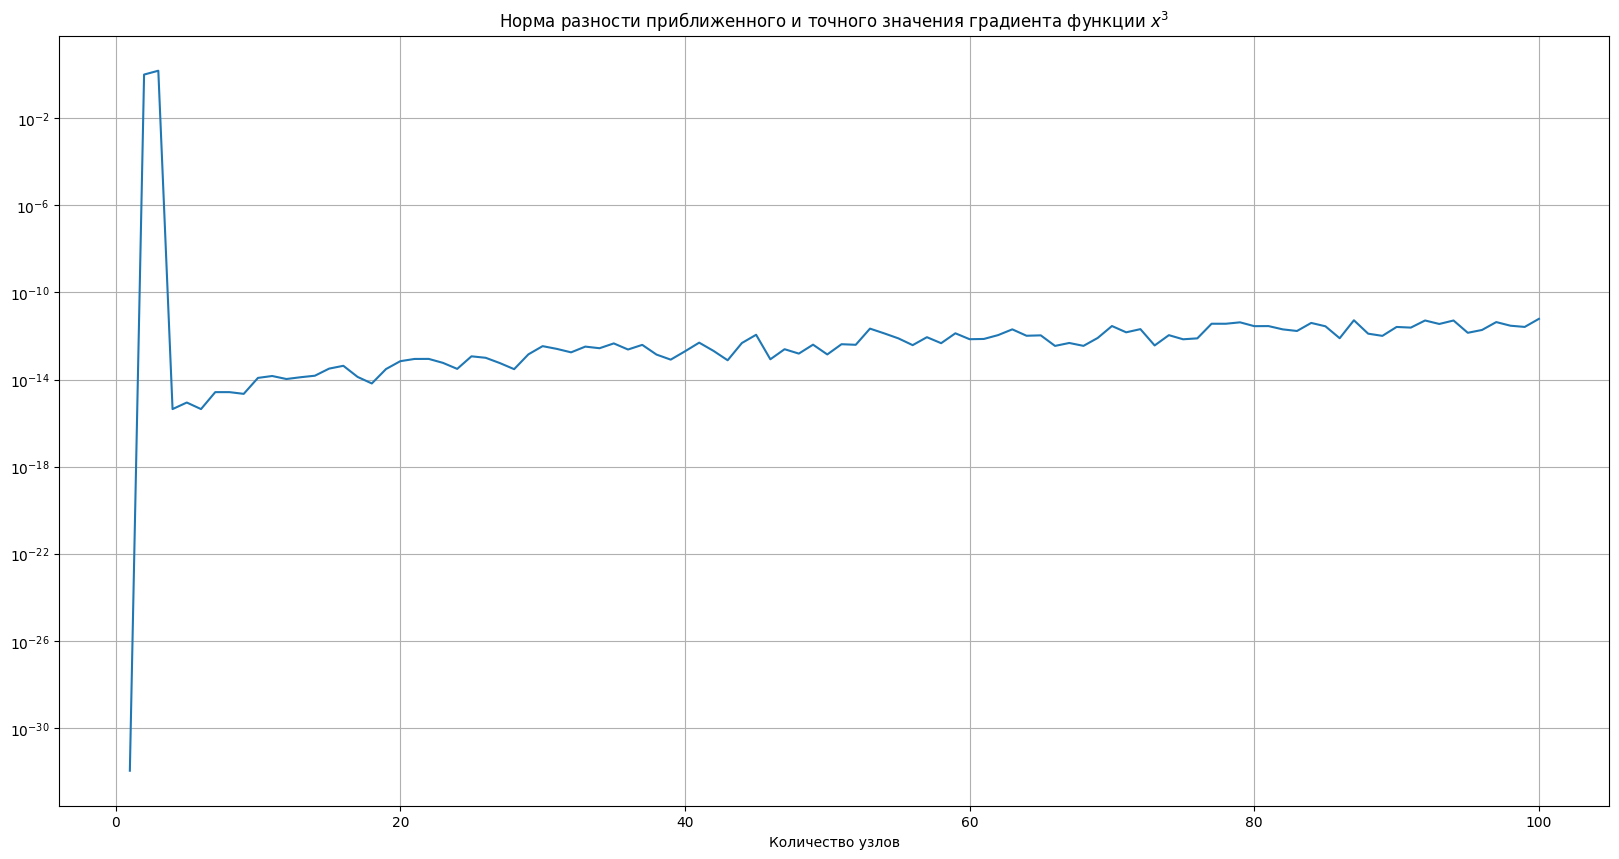

In [5]:
calc_and_draw_plot(lambda x: x ** 3, lambda x: 3 * x ** 2, 100, "$x^3$", -1, 1)

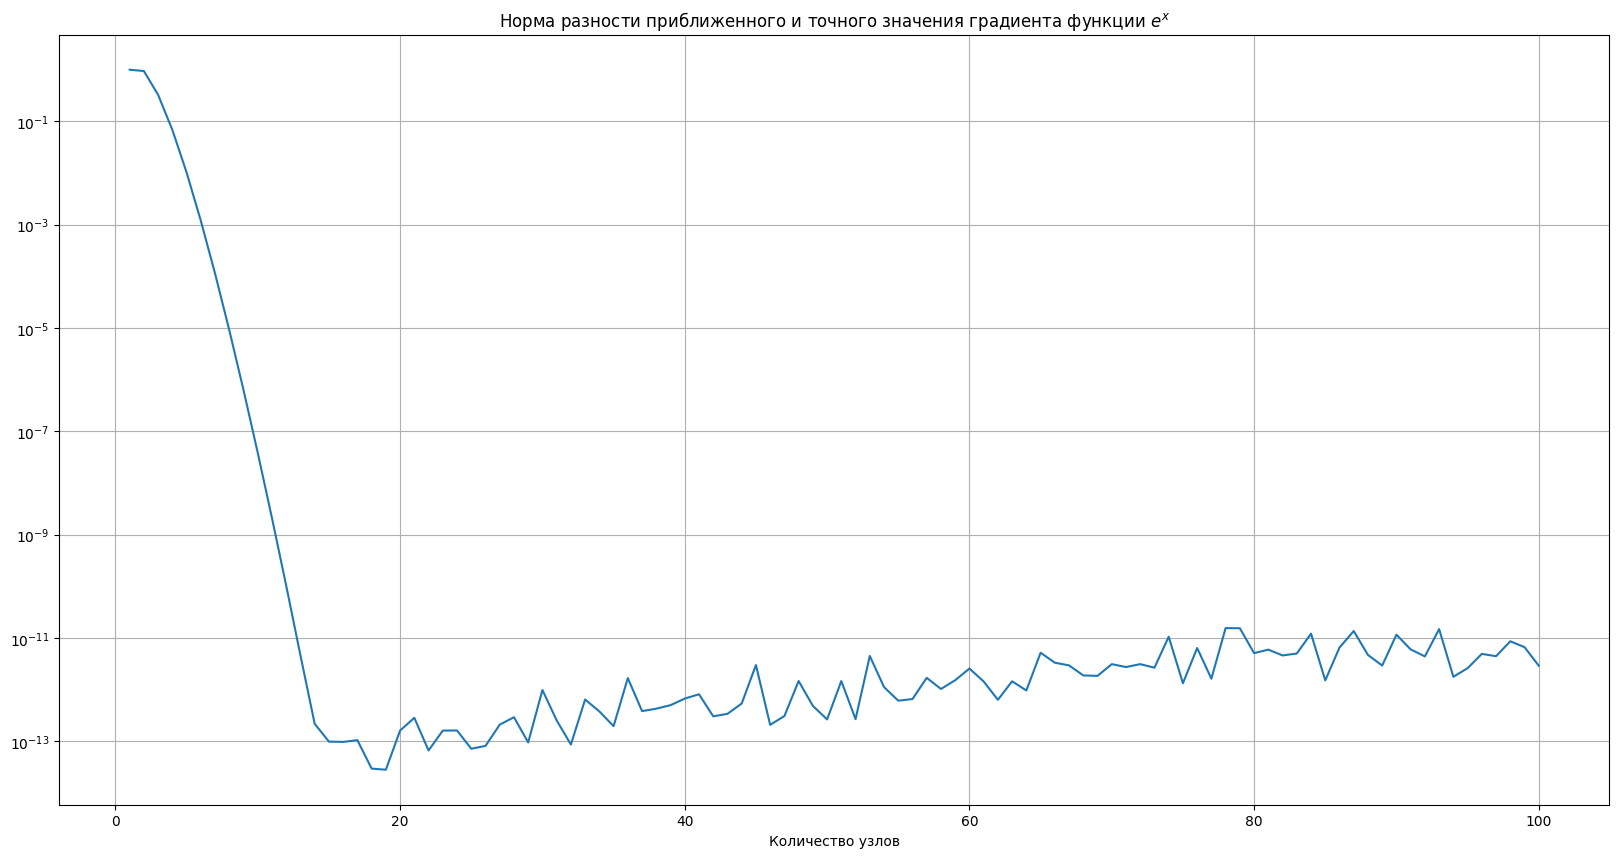

In [6]:
calc_and_draw_plot(np.exp, np.exp, 100, r"$e^x$", -1, 1)

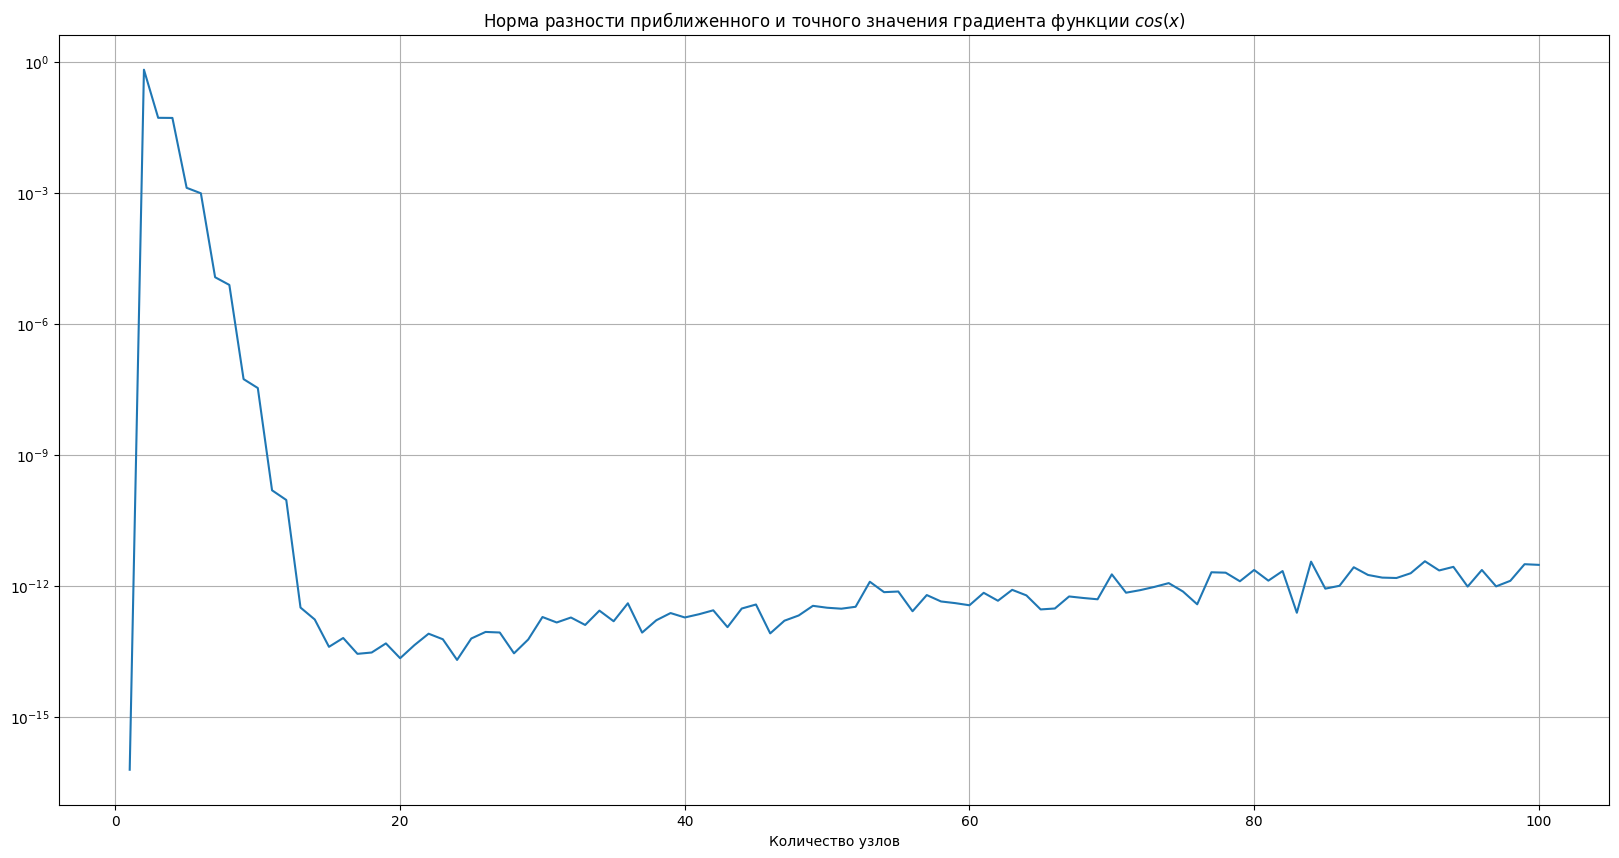

In [7]:
calc_and_draw_plot(np.cos, lambda x: -1 * np.sin(x), 100, r"$cos(x)$", -1, 1)

Как видим, производная действительно хорошо приближается.